Importing all essential Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score ,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

Loading dataset

In [3]:
path = "Loan_Data.csv"
df = pd.read_csv(path)

First 10 rows 

In [5]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Checking missing values

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Handling Missing values now 

In [ ]:
categorical_cols = ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df['LoanAmount'] = df["LoanAmount"].fillna(df['LoanAmount'].median())

df = df.drop(columns=["Loan_ID"])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Missing Values after handling them

In [95]:
print("Missing values are now : ",df.isnull().sum().sum())

Missing values are now :  0


Checking for duplicated

In [27]:
print(df.duplicated().sum())

0


Target variable distribution

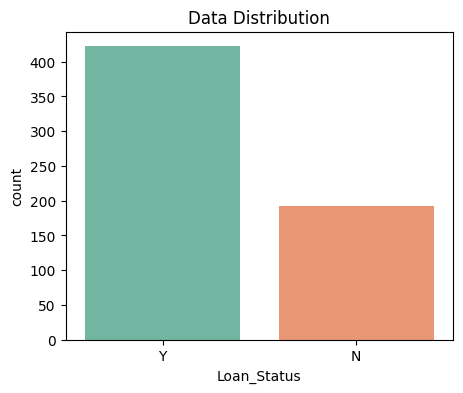

In [31]:
plt.figure(figsize=(5 ,4))
sns.countplot(x='Loan_Status' , data = df ,palette = 'Set2')
plt.title("Data Distribution")
plt.show()

In [90]:
df.shape

(614, 12)

Numeric Columns histogram

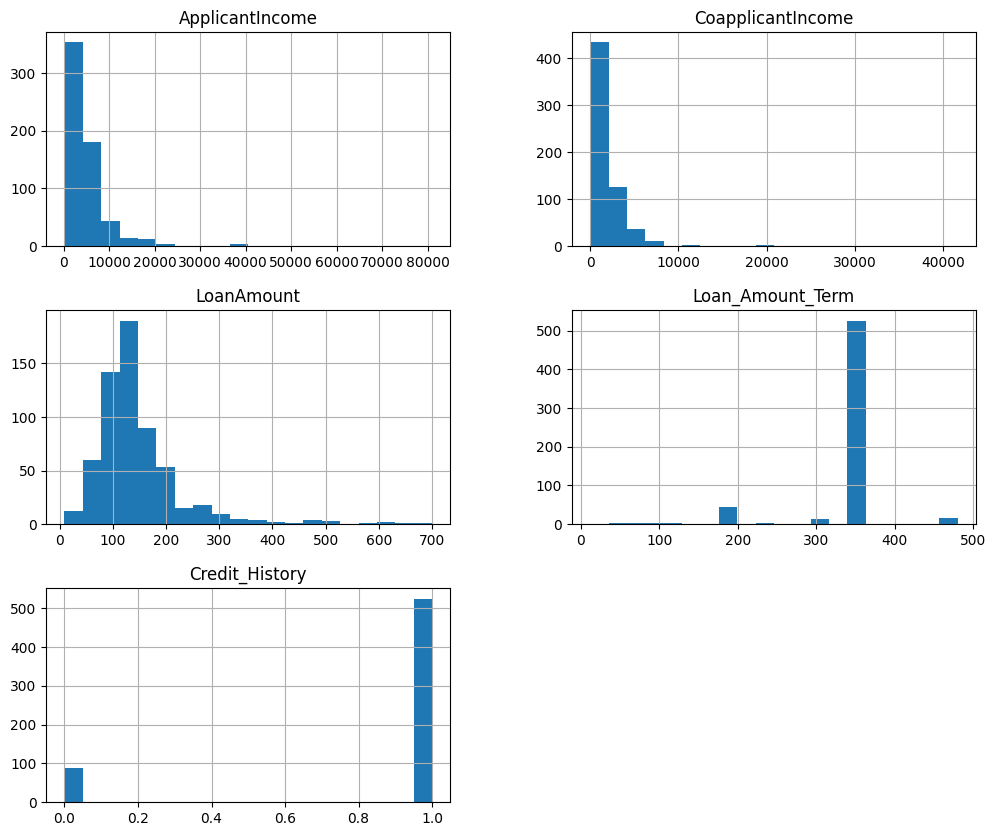

In [33]:
numeric_cols = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount' ,'Loan_Amount_Term'	, 'Credit_History']
df[numeric_cols].hist(figsize=(12 ,10) ,bins = 20 )
plt.show()

Converting text data into 0s and 1s

In [37]:
le = LabelEncoder()
text_cols = ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History','Education','Property_Area',]
for col in text_cols:
    df[col] = le.fit_transform(df[col])

df['Loan_Status'] = le.fit_transform(df["Loan_Status"])    

Drawing heatmap

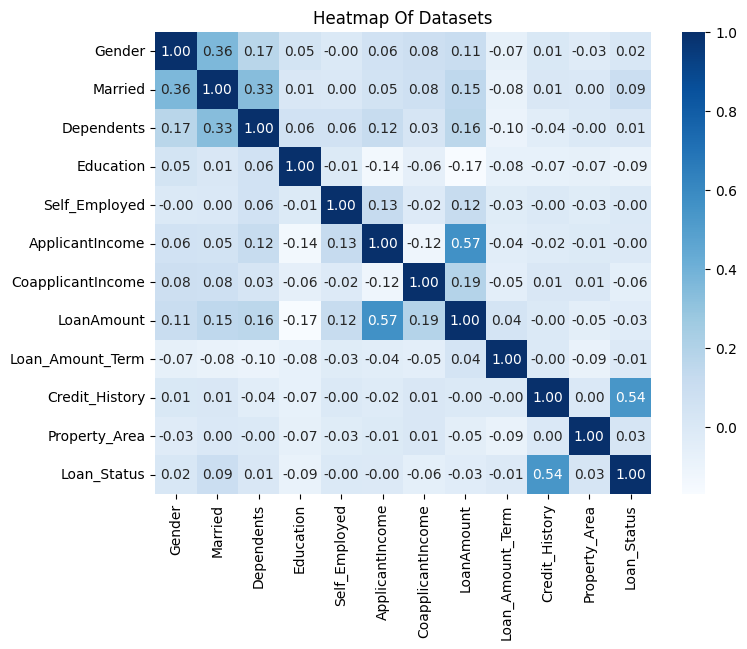

In [42]:
plt.figure(figsize=(8 ,6))
sns.heatmap(df.corr() , annot = True ,fmt = '.2f',cmap = 'Blues')
plt.title("Heatmap Of Datasets")
plt.show()

Setting X and y 

In [43]:
X = df.drop(columns=["Loan_Status"] ,axis = 1)
y = df['Loan_Status']

Training X and y 

In [44]:
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state=42 ,test_size=0.2)
print (f"X Train values are :{X_train.shape}")
print (f"X Test values are : {X_test.shape}")

X Train values are :(491, 11)
X Test values are : (123, 11)


Implementing models 

In [48]:
tree = DecisionTreeClassifier(random_state =42 , max_depth = 5)
rf = RandomForestClassifier(random_state = 42 , n_estimators = 100)
logreg = LogisticRegression(random_state = 42,  max_iter = 1000)

Fitting them

In [92]:
tree.fit(X_train , y_train)
print("Decision Tree Model")
print("Feature importances:", tree.feature_importances_)
print("Model parameters:", tree.get_params())
rf.fit(X_train , y_train)
print("Random Forest Model")
print("Feature importances:", rf.feature_importances_)
print("Model parameters:", rf.get_params())

Decision Tree Model
Feature importances: [0.         0.         0.         0.         0.         0.08955218
 0.07469214 0.09499296 0.03599895 0.67278513 0.03197865]
Model parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Random Forest Model
Feature importances: [0.02071783 0.02364773 0.04814065 0.02127138 0.02071297 0.20266642
 0.11386141 0.18502219 0.05144286 0.26291413 0.04960244]
Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None

Scaling it for Logistic Regression

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
logreg.fit(X_train_scaled , y_train)
print("Logistic Regression Model")
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)
print("Model parameters:", logreg.get_params())


Logistic Regression Model
Coefficients: [[-0.06570058  0.31554025  0.1227705  -0.15393532  0.05225058 -0.02611721
  -0.1483721  -0.18181332  0.10025547  1.31333947  0.0843789 ]]
Intercept: [0.88592344]
Model parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Predicting 

In [55]:
y_pred_tree = tree.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_logreg = logreg.predict(X_test)

Finding Accuracy_Score , Confusion_matrix , Classification_report of all three models

In [ ]:
print("\nDecison Tree Model")
acc_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy Score of Tree model is : {accuracy_score(y_test ,y_pred_tree)}")
print(f"Confusin matrix  of Tree model is : {confusion_matrix(y_test ,y_pred_tree)}")
print(f"Classification report of Tree model is : {classification_report(y_test ,y_pred_tree)}")


print("\n RandomForest Model")
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Score of rf model is : {accuracy_score(y_test ,y_pred_rf)}")
print(f"Confusin matrix  of rf model is : {confusion_matrix(y_test ,y_pred_rf)}")
print(f"Classification report of rf model is : {classification_report(y_test ,y_pred_rf)}")


print("\n Logistic Regression Model")
acc_log = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy Score of logreg model is : {accuracy_score(y_test ,y_pred_logreg)}")
print(f"Confusin matrix  of logreg model is : {confusion_matrix(y_test ,y_pred_logreg)}")
print(f"Classification report of logreg model is : {classification_report(y_test ,y_pred_logreg)}")


Decison Tree Model
Accuracy Score of Tree model is : 0.7479674796747967
Confusin matrix  of Tree model is : [[19 24]
 [ 7 73]]
Classification report of Tree model is :               precision    recall  f1-score   support

           0       0.73      0.44      0.55        43
           1       0.75      0.91      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123


 RandomForest Model
Accuracy Score of rf model is : 0.7560975609756098
Confusin matrix  of rf model is : [[18 25]
 [ 5 75]]
Classification report of rf model is :               precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123


 Logistic Re

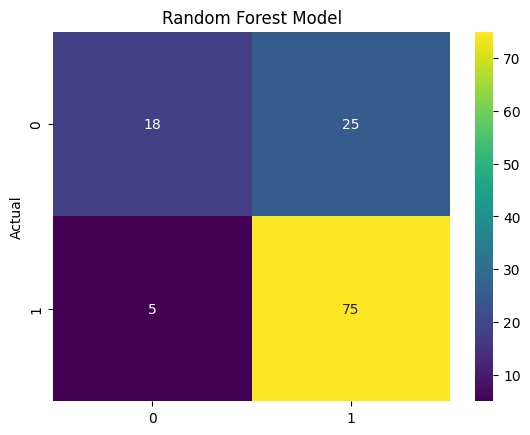

In [73]:
cm = confusion_matrix(y_test , y_pred_rf)
sns.heatmap(cm , annot=True, fmt = 'd', cmap= 'viridis')
plt.title("Random Forest Model")
plt.ylabel("Actual")
plt.show()

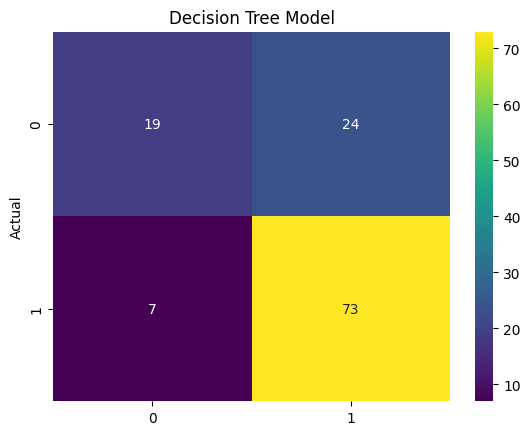

In [74]:
cm = confusion_matrix(y_test , y_pred_tree)
sns.heatmap(cm , annot=True, fmt = 'd', cmap= 'viridis')
plt.title("Decision Tree Model")
plt.ylabel("Actual")
plt.show()

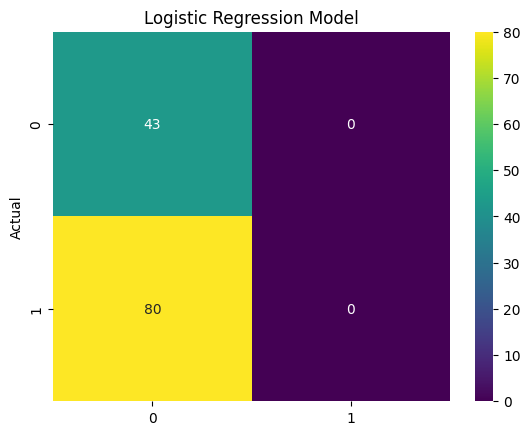

In [75]:
cm = confusion_matrix(y_test , y_pred_logreg)
sns.heatmap(cm , annot=True, fmt = 'd', cmap= 'viridis')
plt.title("Logistic Regression Model")
plt.ylabel("Actual")
plt.show()

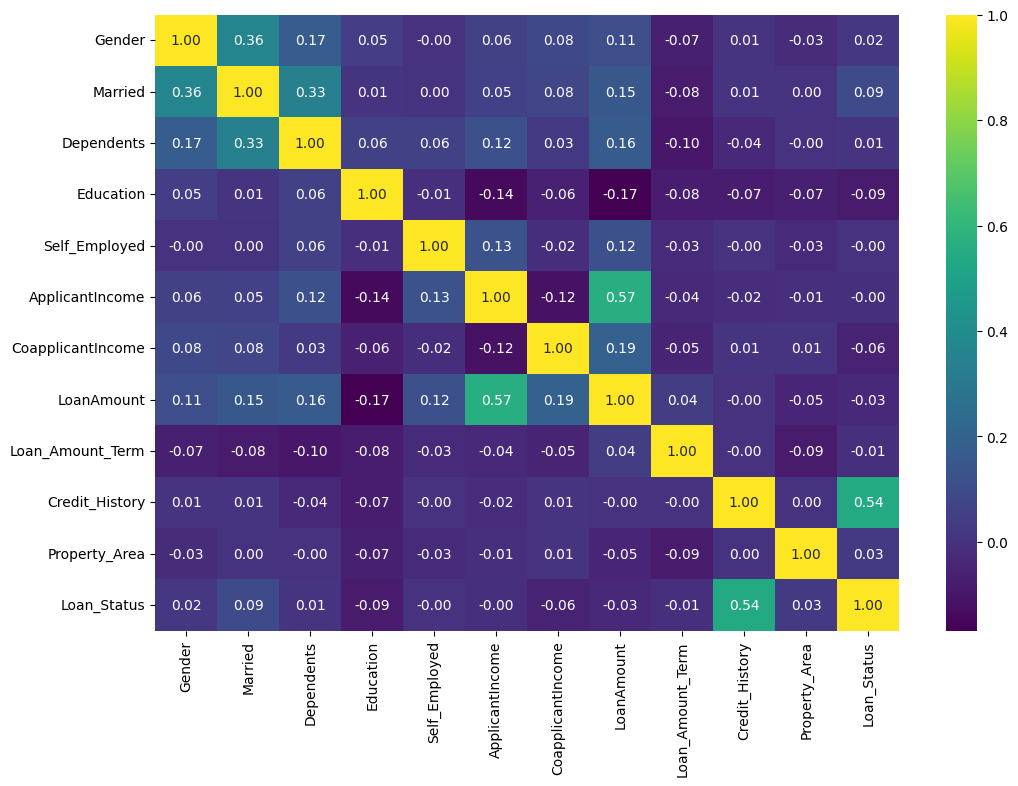

In [76]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot= True ,fmt = '.2f', cmap= 'viridis' )
plt.show()

Accuracy Barplot 

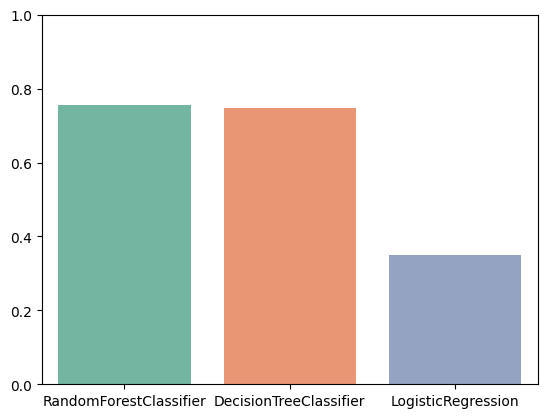

In [82]:
models = ["RandomForestClassifier", "DecisionTreeClassifier", "LogisticRegression"]
accuracies = [accuracy_score(y_test,y_pred_rf), accuracy_score(y_test ,y_pred_tree), accuracy_score(y_test ,y_pred_logreg)]
sns.barplot(x = models ,y = accuracies, palette="Set2" )
plt.ylim(0 ,1)
plt.show()

Models accuracies comaparision

In [88]:
model_score = {
    'RandomForestClassifier' : acc_rf ,
    "DecisionTreeClassifier ": acc_tree, 
    "LogisticRegression " : acc_log
}
best_model = max(model_score , key= model_score.get)

print("\nModel Comparision")
for name , score in model_score.items():
    print(f"{name} :{score :.4f}")

print("\nBest model is ",best_model)    




Model Comparision
RandomForestClassifier :0.7561
DecisionTreeClassifier  :0.7480
LogisticRegression  :0.3496

Best model is  RandomForestClassifier


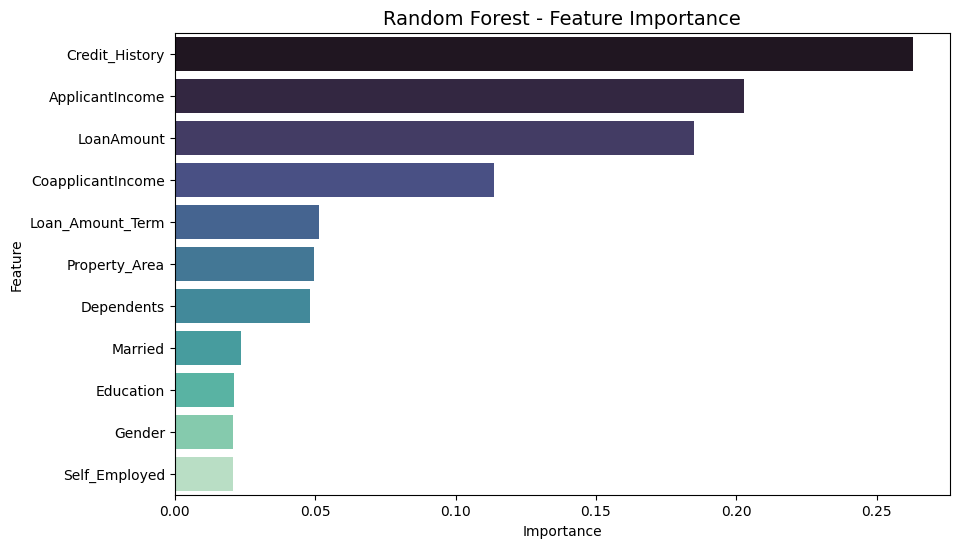

In [89]:
importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importance.values, y=importance.index, palette='mako')
plt.title("Random Forest - Feature Importance", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()